### **Artificial Neural Network (ANN) - Understanding and Predicting Bank Customer Churn**

#### **1. Introduction to Artificial Neural Networks (ANNs)**

* Artificial Neural Networks (ANNs), also known as neural networks, are a fundamental component of deep learning, a subfield of machine learning. 

* Inspired by the human brain's biological neural network, an ANN is composed of interconnected nodes or "neurons" arranged in layers.

* These networks are highly effective at identifying complex, non-linear patterns in data, making them ideal for tasks like image recognition, natural language processing, and in this case, predicting customer churn.

* A basic feedforward neural network, the type we will be building, has three main types of layers:

  * **Input Layer:** This layer receives the raw data. Each neuron in this layer corresponds to a feature in the input dataset.

  * **Hidden Layers:** These layers are where the "learning" happens. They perform computations on the data received from the previous layer, processing it further before passing it on. A deep neural network has multiple hidden layers.

  * **Output Layer:** This layer provides the final output or prediction of the model. For our binary classification problem (churn or no churn), this layer will have a single neuron.

* The connections between neurons have an associated "weight," which determines the strength of the connection. During training, the network iteratively refines these weights to improve its predictive accuracy.

---

#### **2. Problem Statement**

* Customer churn, or the rate at which customers leave a business, is a critical metric for any company. 

* For a bank, a high churn rate can lead to significant revenue loss. 

* The goal of this notebook tutorial is to build a deep learning model to predict which bank customers are likely to churn (exited the bank) based on their historical data. 

* We will use an ANN to identify the complex relationships between customer attributes and their likelihood to churn.

* The dataset we will be using is a publicly available "Bank Customer Churn" dataset from Kaggle. It contains information on 10,000 customers of a multinational bank.

#### **3. Setting Up the Environment and Loading the Data**

* First, we need to import the necessary libraries and load our dataset. 

* We'll use `pandas` for data manipulation, `matplotlib` and `seaborn` for visualization, and `tensorflow` with `keras` for building our ANN.

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
# Load the dataset
df = pd.read_csv('bank_customer_churn_prediction.csv')

# Display the first 5 rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Display the shape of the dataframe
df.shape

(7043, 21)

In [67]:
# Display the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### **4. Exploratory Data Analysis (EDA) and Data Preprocessing**

* Before building our model, we must clean and prepare the data.

##### **4.1 Dropping Irrelevant Columns**

* `customerID` is having unique identifiers and have no predictive power for customer churn. 

* We will drop it from our dataset.

In [68]:
# Dropping Irrelevant Columns
df.drop('customerID', axis='columns', inplace=True)

# Display the first 5 rows of the updated dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
# Check for TotalCharges datatype and values
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [70]:
# TotalCharges column has some spaces which are causing it to be of object datatype. 
# We will convert these to NaN and then to numeric.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [71]:
# Check for null values in TotalCharges
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [72]:
# Display rows with null TotalCharges
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [73]:
# Display the shape of the dataframe
df.shape

(7043, 20)

In [26]:
# Display the shape of the dataframe after removing rows with null TotalCharges values
df[df.TotalCharges.notnull()].shape

(7032, 20)

In [74]:
# Remove rows with null TotalCharges values
df1 = df[df.TotalCharges.notnull()]
df1.shape

(7032, 20)

In [75]:
# Display the data types of each column in the cleaned dataframe
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [76]:
# Check the values of TotalCharges in the cleaned dataframe
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [77]:
# Check the distribution of the target variable 'Churn'
df1[df1.Churn=='No'].shape, df1[df1.Churn=='Yes'].shape

((5163, 20), (1869, 20))

In [78]:
# Check the distribution of the target variable 'Churn'
df1[df1.Churn=='Yes'].shape

(1869, 20)

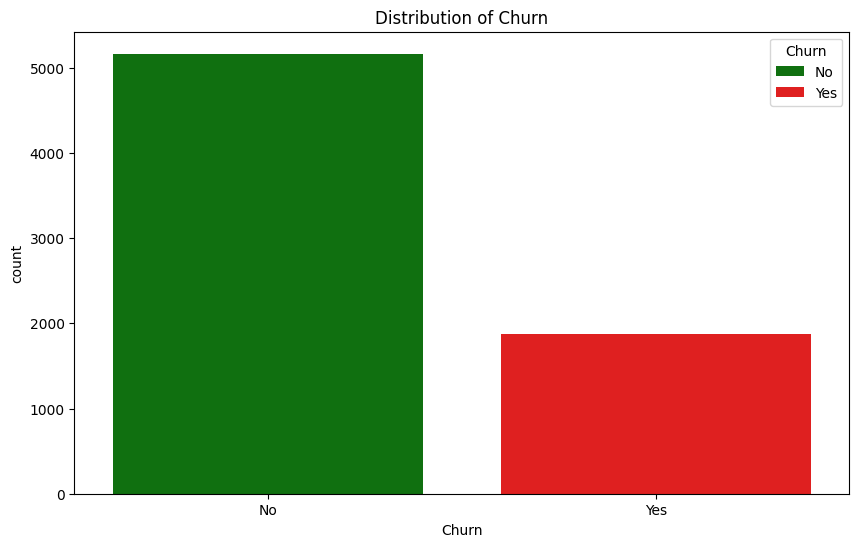

In [79]:
# Data Visualization - Countplot for Distribution of Customer Churn
plt.figure(figsize=(10,6))
sns.countplot(x='Churn', data=df1, hue="Churn", palette=['green','red'])
plt.title('Distribution of Churn')
plt.legend(title='Churn', labels=["No", "Yes"], loc='upper right')
plt.show()

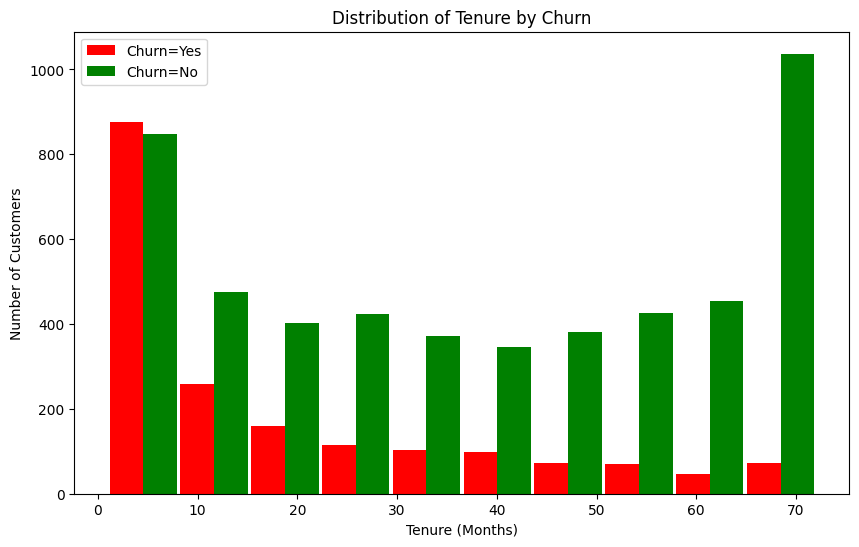

In [80]:
# Data Visualization - Histogram for Tenure based on Churn
plt.figure(figsize=(10,6))

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'], color=['red', 'green'])
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

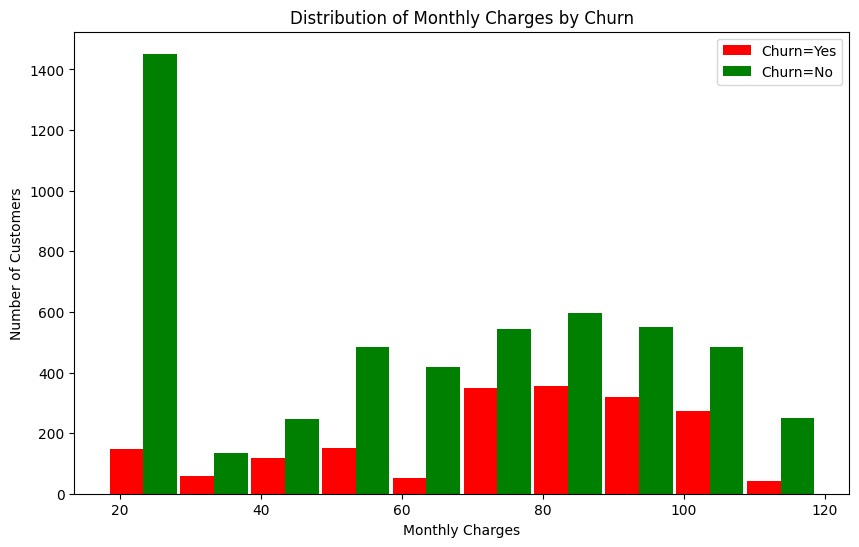

In [81]:
# Data Visualization - Histogram for Monthly Charges based on Churn
plt.figure(figsize=(10,6))
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, label=['Churn=Yes', 'Churn=No'], color=['red', 'green'])
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [82]:
# Function to print unique values in categorical columns
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [83]:
# Print unique values in categorical columns
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
# Replace 'No internet service' and 'No phone service' with 'No'
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [86]:
# Verify the replacements
print_unique_col_values(df1)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


##### **4.2 Replacement [Convert Yes and No to 1 or 0] and One-Hot Encoding of Categorical Data**

* Neural networks work with numerical data. 

* We have a categorical features having Yes/No values like `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`, and `Churn`.

* We will convert `Yes` and `No` to `1` and `0`

* We also have categorical features like `InternetService`, `Contract` and `PaymentMethod` that need to be converted into a numerical format. 

* One-hot encoding is a technique that creates new binary columns for each unique category, which is suitable for this type of data.



In [ ]:
# Convert 'Yes'/'No' columns to 1/0
# List of columns to convert into numerical
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# For each column in the list, replace 'Yes' with 1 and 'No' with 0
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

In [ ]:
# Convert the 'gender' column to numerical
df1['gender'].replace({'Female':0,'Male':1}, inplace=True)

In [92]:
# Verify the conversion in the dataframe with unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [95]:
# Use one-hot encoding for categorical columns like InternetService, Contract, PaymentMethod
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype=int)

# Display the columns of the updated dataframe
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [96]:
# Display a sample of 5 rows from the updated dataframe
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4523,1,1,1,0,10,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3989,0,0,0,1,8,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1698,1,0,1,1,71,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5173,1,0,1,1,4,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
887,0,1,0,0,27,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0


In [97]:
# Display the data types of each column in the final dataframe
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

##### **4.3 Data Scaling**

* The input features have different scales (`tenure','MonthlyCharges','TotalCharges`). 

* To ensure that our model gives equal importance to all features, we will scale the numerical columns to a standard range, typically between 0 and 1. 

* We will use `MinMaxScaler` or `StandardScaler` for this purpose.

In [98]:
# Data Scaling for Numerical Columns tenure, MonthlyCharges, TotalCharges
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# Import MinMaxScaler and scale the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [99]:
# Verify the scaling by checking unique values in each column
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### **5. Training and Testing Split**

* We need to split our dataset into a training set and a testing set. 

* The model will learn from the training data, and its performance will be evaluated on the unseen testing data. 

* A common split is 80% for training and 20% for testing.

In [102]:
# Training and Testing Data Split
# Separate features (X) and target variable (y)
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5625, 26)
Shape of X_test: (1407, 26)


#### **6. Building and Training the ANN Model**

* Now, we will build our Artificial Neural Network using `keras`. 

* We will define a sequential model with an input layer, two hidden layers, and an output layer.

  * **Input Layer:** The first hidden layer also serves as the input layer, with the `input_shape` parameter set to the number of features in our dataset. We will use the `relu` activation function, which is a common choice for hidden layers.

  * **Hidden Layers:** We will add two more dense hidden layers to the network. These layers learn to extract patterns and relationships from the data.

  * **Output Layer:** The final layer has a single neuron, as this is a binary classification problem. We will use the `sigmoid` activation function, which outputs a value between `0` and `1`, representing the probability of the customer churning.

* The model is compiled with the `adam` optimizer and `binary_crossentropy` loss function, which are standard for binary classification problems.

In [106]:
# Build the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model for 100 epochs
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7467 - loss: 0.5261
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7890 - loss: 0.4388
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.4283
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.4227
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8030 - loss: 0.4182
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8085 - loss: 0.4152
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8084 - loss: 0.4128
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8071 - loss: 0.4112
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8071 - loss: 0.4093
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8096 - loss: 0.4074
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8094 - loss: 0.4062
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

#### **7. Model Evaluation**

* After training, we will evaluate the model's performance on the test set.

##### **7.1 Accuracy and Loss**

* We can check the accuracy of the model on the unseen test data. 

* The output will show the model's performance in terms of loss and accuracy.

In [107]:
# Evaluate the model on the test set
# Print loss and accuracy of the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4566
Test Loss: 0.4566
Test Accuracy: 0.7861


##### **7.2 Classification Report**

* A classification report provides a more detailed look at the model's performance, including `precision`, `recall`, and `F1-score` for each class (churned and non-churned).

In [108]:
# Get predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [112]:
# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



##### **7.3 Confusion Matrix**

* A confusion matrix is a powerful visualization tool that shows the number of correct and incorrect predictions made by the model. 

* It helps us understand where the model is making errors.

  * **True Positives (TP):** Correctly predicted churned customers.
  
  * **True Negatives (TN):** Correctly predicted non-churned customers.
  
  * **False Positives (FP):** Incorrectly predicted churned customers (Type I error).
  
  * **False Negatives (FN):** Incorrectly predicted non-churned customers (Type II error).

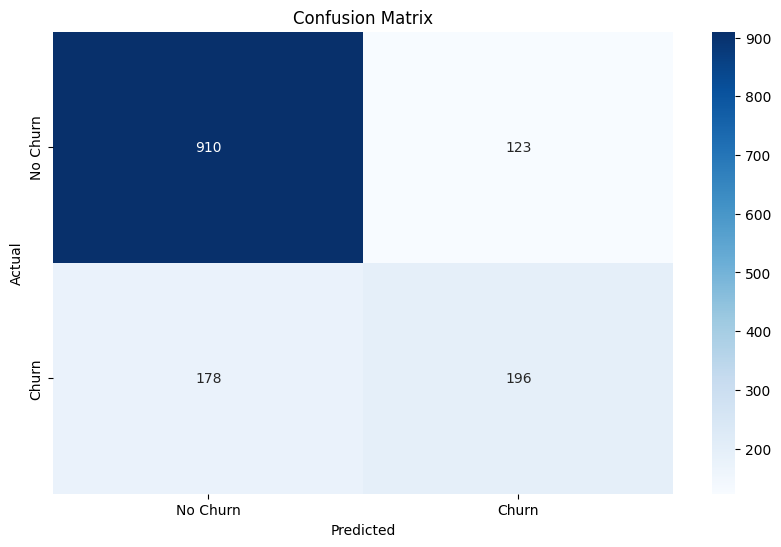

In [115]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **8. Analysis of Results**

* Based on the classification report and confusion matrix, we can analyze the model's performance:

  * **Accuracy:** The overall accuracy of the model on the test set.
  
  * **Precision:** For the "Churn" class, precision tells us what proportion of customers predicted to churn actually churned.
  
  * **Recall:** For the "Churn" class, recall tells us what proportion of all actual churned customers were correctly identified.
  
  * **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance on the churn class.

* These metrics are crucial for imbalanced datasets, where simply looking at accuracy can be misleading. 

* A good recall score for the churn class is often desired, as it means the model is effective at identifying customers who are likely to leave, allowing the bank to take proactive measures.

#### **9. Summary**

* In this notebook, we successfully built and trained an Artificial Neural Network (ANN) to predict bank customer churn. 

* We covered essential data science steps, from data preprocessing and visualization to model building and evaluation. 

* The model's performance, as measured by the classification report and confusion matrix, demonstrates its ability to identify customers at risk of churning, providing valuable insights for the bank's retention strategy.

---

*Deep Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)